# Feedforward Neural Network

In [1]:
import numpy as np
import pandas as pd       
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

The LabelBinarizer will be used to convert our integer labels as vector labels, for transforming categorical labels from a single integer to a vector. The Sequential class indicates that our network will be feedforward and layers will be added sequentially, one on top of the other. Dense is for the implementation of our fully connected layers. 

### Load the MNIST dataset
The MNIST database consists of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. 


The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

Dataset URL : http://yann.lecun.com/exdb/mnist/

In [39]:
((Xtrain, Ytrain), (Xtest, Ytest)) = mnist.load_data()
print("MNIST dataset")
print('Shape of training data',Xtrain.shape)
print('Shape of test data',Xtest.shape)

MNIST dataset
Shape of training data (60000, 28, 28)
Shape of test data (10000, 28, 28)


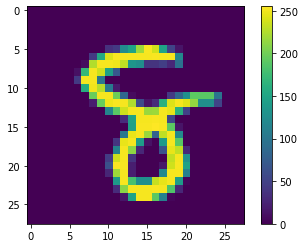

8


In [40]:
plt.figure()
plt.imshow(Xtrain[58888])
plt.colorbar()
plt.show()
print(Ytrain[58888])

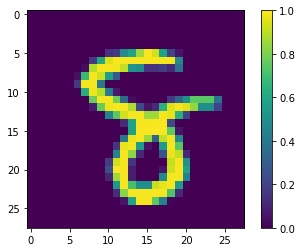

8


In [41]:
# scale data to the range of [0, 1]
Xtrain = Xtrain.astype("float32") / 255.0
Xtest = Xtest.astype("float32") / 255.0
plt.figure()
plt.imshow(Xtrain[58888])
plt.colorbar()
plt.show()
print(Ytrain[58888])

In [42]:
# convert the labels from integers to vectors
Ytrain = LabelBinarizer().fit_transform(Ytrain)
Ytest = LabelBinarizer().fit_transform(Ytest)

In [43]:
#Define our network architecture (784-256-128-10)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256))
model.add(Activation("sigmoid"))
model.add(BatchNormalization())
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(BatchNormalization())
model.add(Dense(10, activation="softmax"))

In [44]:
# Train the model using SGD

batch_size=128
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
Hyp = model.fit(Xtrain, Ytrain, validation_data=(Xtest,Ytest), epochs=10, batch_size=batch_size)
#Hyp = model.fit(Xtrain, Ytrain, validation_data=(Xtest,Ytest), epochs=10)




Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5115 - accuracy: 0.8480 - val_loss: 0.4277 - val_accuracy: 0.9035
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3439 - accuracy: 0.9011 - val_loss: 0.3027 - val_accuracy: 0.9139
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3140 - accuracy: 0.9092 - val_loss: 0.2879 - val_accuracy: 0.9195
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2967 - accuracy: 0.9155 - val_loss: 0.2731 - val_accuracy: 0.9243
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2810 - accuracy: 0.9195 - val_loss: 0.2628 - val_accuracy: 0.9263
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2690 - accuracy: 0.9246 - val_loss: 0.2534 - val_accuracy: 0.9279
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2580 - accuracy: 0.9283 - val_loss: 0.2460 - val_accuracy: 0.9318
Epoch 

In [9]:
# evaluate the network on the testing data to obtain our final classifications

print("Evaluating network...")

test_loss, test_acc = model.evaluate(Xtest,  Ytest)


Evaluating network...
10000/10000 [==============================] - 0s 23us/sample - loss: 0.3466 - acc: 0.9019


In [10]:
predictions = model.predict(Xtest)
print(predictions[0])
print(np.argmax(predictions[0]))

[2.9722875e-04 6.7884284e-06 1.1329845e-04 1.5443551e-03 1.1951549e-05
 1.2394664e-04 1.2751048e-07 9.9199122e-01 2.3715760e-05 5.8872993e-03]
7


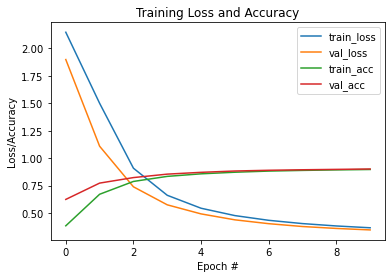

In [11]:
# plot the training loss and accuracy

plt.figure()
plt.plot(np.arange(0, 10), Hyp.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), Hyp.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), Hyp.history["acc"], label="train_acc")
plt.plot(np.arange(0, 10), Hyp.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()